# Exploratory Data Analysis for the CBIS-DDSM dataset

Read the four csv files that describe the CBIS-DDSM dataset, and represent the distribution of the data. 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [73]:
pd.options.mode.chained_assignment = None  # default='warn'

In [79]:
#read the four csv files and store them in a DataFrame
calc_test_df = pd.read_csv("/Users/giulia/Desktop/EXETER/ECM3401 Dissertation Project/Code (github)/Dissertation-Project/csv files/calc_case_description_test_set.csv")
calc_train_df = pd.read_csv("/Users/giulia/Desktop/EXETER/ECM3401 Dissertation Project/Code (github)/Dissertation-Project/csv files/calc_case_description_train_set.csv")
mass_test_df = pd.read_csv("/Users/giulia/Desktop/EXETER/ECM3401 Dissertation Project/Code (github)/Dissertation-Project/csv files/mass_case_description_test_set.csv")
mass_train_df = pd.read_csv("/Users/giulia/Desktop/EXETER/ECM3401 Dissertation Project/Code (github)/Dissertation-Project/csv files/mass_case_description_train_set.csv")

In [80]:
#define function to substitute "MALIGNANT" cases with 1, and "BENIGN" cases with 0
def replace(pathology_df):
    for i in range(pathology_df.shape[0]):
        #print(pathology_df.loc[i, 'pathology'])
        if pathology_df.loc[i, 'pathology'] == "MALIGNANT":
            pathology_df.loc[i, 'pathology'] = 1
        else:
            pathology_df.loc[i, 'pathology'] = 0

    #return pathology_df

In [81]:
#replace all instances in 'pathology'
calc_test_pathology_df = calc_test_df[['patient_id', 'pathology']]
replace(calc_test_pathology_df)

calc_train_pathology_df = calc_train_df[['patient_id', 'pathology']]
replace(calc_train_pathology_df)

mass_test_pathology_df = mass_test_df[['patient_id', 'pathology']]
replace(mass_test_pathology_df)

mass_train_pathology_df = mass_train_df[['patient_id', 'pathology']]
replace(mass_train_pathology_df)


In [82]:
# Count the occurrences of each value (0 and 1)
calc_test_value_counts = calc_test_pathology_df['pathology'].value_counts()

calc_train_value_counts = calc_train_pathology_df['pathology'].value_counts()

mass_test_value_counts = mass_test_pathology_df['pathology'].value_counts()

mass_train_value_counts = mass_train_pathology_df['pathology'].value_counts()

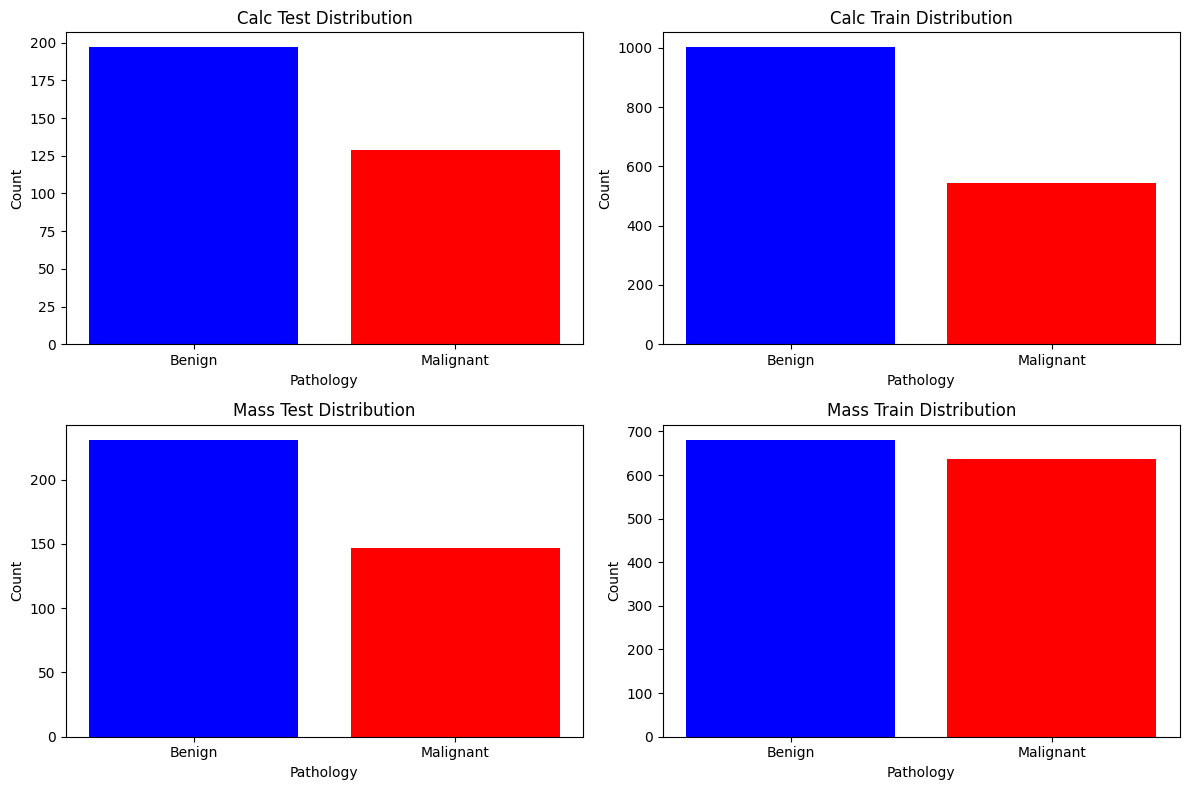

In [83]:
# Combine data into a list for iteration
datasets = [
    ('Calc Test', calc_test_value_counts),
    ('Calc Train', calc_train_value_counts),
    ('Mass Test', mass_test_value_counts),
    ('Mass Train', mass_train_value_counts),
]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2x2 grid of subplots
colors = ['blue', 'red']  # Colors for Benign and Malignant

# Loop through datasets and axes
for ax, (title, counts) in zip(axes.flatten(), datasets):
    ax.bar(['Benign', 'Malignant'], counts, color=colors)
    ax.set_title(f'{title} Distribution')
    ax.set_xlabel('Pathology')
    ax.set_ylabel('Count')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()